# Insurance Cross-Sell Prediction
Predict which of last year's health insurance customers would be interested in purchasing auto insurance to streamline the marketing and communications process.

## Business Understanding

Insurance companies usually offer a suite of products to help people protect the things that matter through life's ups and downs. Health insurance, vehicle insurance, life insurance all operate on the same basic principles of insurance. However, people think about these insurance products differently and shop for them individually. It becomes the job of the insurance provider to consider if their customers with one type of policy might be interested in another type of policy as well, and the practice of reaching out to a customer who has already purchased one type of insurance policy (health) from the company and offering them another type of insurance policy (in this case, vehicle insurance) is known as a "cross-sell."

We aim to help companies with this area of business in two ways:

1. The primary goal of this project is to predict who will convert when contacted with the cross-sell offer.

&nbsp;&nbsp;&nbsp;&nbsp; There are too many existing health insurance customers for any individual employee or even team of employees to go through them all and classify them as a lead or not, especially when you consider the mental fatigue this could induce on top of needing to actually make the sales contact. Not to mention that the list of health insurance customers is changing everyday! Allowing machine learning to take over this task frees up salespeople to make sales, and improves performance over random selection of leads.

2. The secondary goal of this project is to examine model artefacts (coefficients in parametric models, feature importances in tree-based models) and perform quality data analysis to understand why some cross-sells are or are not successful.

&nbsp;&nbsp;&nbsp;&nbsp;This understanding can be used by the marketing team and the product-development team to help inform their departmental dicussions related to marketing campaigns and product offerings. Our model will allow these teams to be data-driven in responding to customer needs rather than guessing what could be influencing customer behavior.

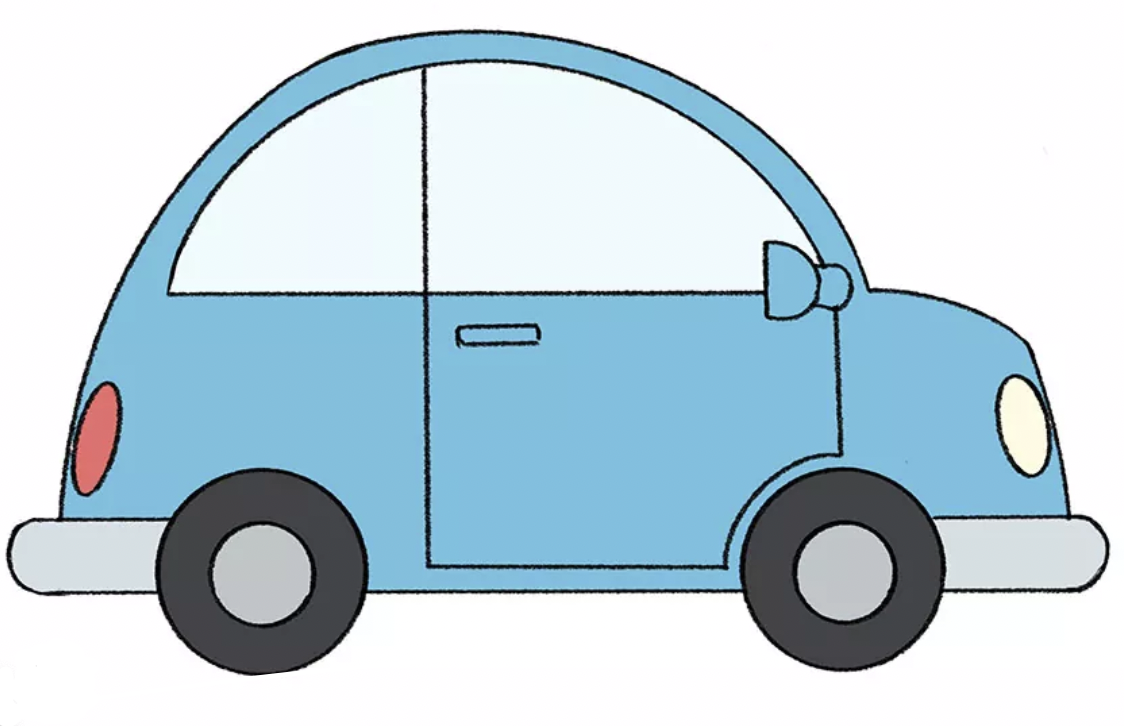

## Data Understanding

This notebook utilizes data on 381,109 customers of a large insurance provider to predict which customers will be interested in purchasing vehicle insurance.

The goal of the model is two-fold: to **generate leads** from among our existing health insurance customers for the sales team in charge of reaching out to new and existing customers about purchasing vehicle insurance, and to **provide insight** for the marketing and product-creation teams regarding the factors that influence a potential customer's decision to purchase insurance.

The data on each customer includes demographic information, information about the customer's vehicle and information about their current health insurance policy.

**Data Credits**

The data used in this project was sourced from [this posting on Kaggle](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction). The author of this notebook did not participate in the competition.

In [1]:
# set a random seed for reproducibility
seed = 2012

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Understanding</a></span></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Understanding</a></span></li><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-Target" data-toc-modified-id="Distribution-of-Target-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Distribution of Target</a></span></li><li><span><a href="#Correlation-between-Features-and-Target" data-toc-modified-id="Correlation-between-Features-and-Target-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Correlation between Features and Target</a></span><ul class="toc-item"><li><span><a href="#Gender" data-toc-modified-id="Gender-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Age" data-toc-modified-id="Age-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Age</a></span></li><li><span><a href="#Driver's-License" data-toc-modified-id="Driver's-License-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Driver's License</a></span></li><li><span><a href="#Region" data-toc-modified-id="Region-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Region</a></span></li><li><span><a href="#Previously-Insured" data-toc-modified-id="Previously-Insured-5.2.5"><span class="toc-item-num">5.2.5&nbsp;&nbsp;</span>Previously Insured</a></span></li><li><span><a href="#Vehicle-Damage" data-toc-modified-id="Vehicle-Damage-5.2.6"><span class="toc-item-num">5.2.6&nbsp;&nbsp;</span>Vehicle Damage</a></span></li><li><span><a href="#Vehicle-Age" data-toc-modified-id="Vehicle-Age-5.2.7"><span class="toc-item-num">5.2.7&nbsp;&nbsp;</span>Vehicle Age</a></span></li><li><span><a href="#Vintage" data-toc-modified-id="Vintage-5.2.8"><span class="toc-item-num">5.2.8&nbsp;&nbsp;</span>Vintage</a></span></li><li><span><a href="#Annual-Premium" data-toc-modified-id="Annual-Premium-5.2.9"><span class="toc-item-num">5.2.9&nbsp;&nbsp;</span>Annual Premium</a></span></li><li><span><a href="#Policy-Sales-Channel" data-toc-modified-id="Policy-Sales-Channel-5.2.10"><span class="toc-item-num">5.2.10&nbsp;&nbsp;</span>Policy Sales Channel</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Helper-Functions-for-Preprocessing" data-toc-modified-id="Helper-Functions-for-Preprocessing-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Helper Functions for Preprocessing</a></span></li><li><span><a href="#Preprocessing-Pipeline" data-toc-modified-id="Preprocessing-Pipeline-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Preprocessing Pipeline</a></span></li><li><span><a href="#Fit-Pipeline-to-Training-Data" data-toc-modified-id="Fit-Pipeline-to-Training-Data-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Fit Pipeline to Training Data</a></span></li><li><span><a href="#Transform-Test-Data-Using-Fitted-Pipeline" data-toc-modified-id="Transform-Test-Data-Using-Fitted-Pipeline-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Transform Test Data Using Fitted Pipeline</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#K-Neighbors-Classifier" data-toc-modified-id="K-Neighbors-Classifier-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>K Neighbors Classifier</a></span></li><li><span><a href="#Ensemble-Method" data-toc-modified-id="Ensemble-Method-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Ensemble Method</a></span></li><li><span><a href="#Voting-Classifier" data-toc-modified-id="Voting-Classifier-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Voting Classifier</a></span></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Final Model</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Simulation:-A-Month-of-Cross-Sells" data-toc-modified-id="Simulation:-A-Month-of-Cross-Sells-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Simulation: A Month of Cross-Sells</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#Other-Models" data-toc-modified-id="Other-Models-16.1"><span class="toc-item-num">16.1&nbsp;&nbsp;</span>Other Models</a></span></li><li><span><a href="#Lead-Bands" data-toc-modified-id="Lead-Bands-16.2"><span class="toc-item-num">16.2&nbsp;&nbsp;</span>Lead Bands</a></span></li></ul></li></ul></div>

## Import Packages

In [2]:
# opening zipped data to load
from zipfile import ZipFile

# data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# model selection
from sklearn.model_selection import train_test_split, KFold
from sklearn.base import clone

# preprocessing & pipelines
from sklearn.preprocessing import (OneHotEncoder, StandardScaler, FunctionTransformer)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# under & over sampling, plus pipeline to use with under & over sampled data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# cross-validation
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV

# modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (AdaBoostClassifier, VotingClassifier)

# classification metrics
from sklearn.metrics import (accuracy_score, recall_score,
                             precision_score, f1_score, fbeta_score,
                             classification_report, confusion_matrix,
                             ConfusionMatrixDisplay, plot_roc_curve,
                             roc_auc_score, roc_curve, precision_recall_curve)

## Load Data

In [3]:
# load training data as pandas dataframe
with ZipFile('data/archive.zip') as zipArchive:
        with zipArchive.open('train.csv') as file:
            data = pd.read_csv(file, index_col = 0)
            
# inspect first 5 rows
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


----

## Data Analysis

### Distribution of Target

In [3]:
# distribution of target
data.Response.value_counts(normalize = True)

0    0.877437
1    0.122563
Name: Response, dtype: float64

This is an **imbalanced** dataset, with only about 12% of records corresponding to customers who were interested in the cross-sell.

### Correlation between Features and Target

#### Gender

In [4]:
# inspect percentage of yes / no responses by gender
print('Male:\n')
print(data.loc[data.Gender == 'Male', 'Response'].value_counts(normalize=True))
print('\n')
print('Female:\n')
print(data.loc[data.Gender == 'Female', 'Response'].value_counts(normalize=True))

Male:

0    0.861589
1    0.138411
Name: Response, dtype: float64


Female:

0    0.896098
1    0.103902
Name: Response, dtype: float64


There is a slight difference in the ratio of response types by gender.

We can apply a chi-square goodness of fit test to determine if the difference is statistically significant.

First, get value counts (not normalized.)

In [6]:
# inspect number of yes / no responses by gender
print('Male:\n')
print(data.loc[data.Gender == 'Male', 'Response'].value_counts())
print('\n')
print('Female:\n')
print(data.loc[data.Gender == 'Female', 'Response'].value_counts())

Male:

0    177564
1     28525
Name: Response, dtype: int64


Female:

0    156835
1     18185
Name: Response, dtype: int64


In [11]:
from scipy import stats # import stats from scipy for chi square goodness of fit test

gender_table = np.array([[177564, 28525], [156835, 18185]]) # create contingency table
alpha = 0.05 # set confidence level
stat, p, dof, expected = stats.chi2_contingency(gender_table) # calculate p-value
# compare p-value to alpha
if p < alpha:
    print('The evidence suggests that conversion is contingent upon gender.')
else:
    print('The evidence does not suggest that conversion is contingent upon gender.')

The evidence suggests that conversion is contingent upon gender.


Check the effect size - while the evidence suggests a difference in distributions exists, is it a noticeably large difference?

In [10]:
# odds ratio
o1 = 28525/177564 # male odds of purchasing
o2 = 18185/156835 # female odds of purchasing
print(f'Odds ratio, male to female: {o1/o2}')
# reinterpret as Cohen's d
print(f'Cohen\'s d: {np.log(o1/o2)/1.81}')

Odds ratio, male to female: 1.385480495031321
Cohen's d: 0.18013646811834746


As expected, the effect size is small (Cohen's *d* is less than 0.2), so while there is significant evidence that our male health insurance customers are more likely to purchase vehicle insurance, the difference between the true proportions in the population is small.

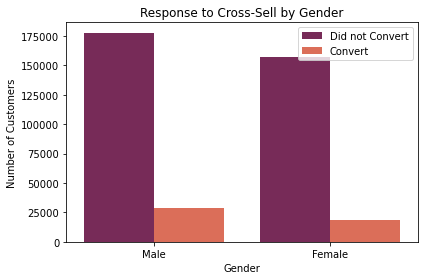

In [12]:
# compare distribution visually of response by gender
fig, ax = plt.subplots()

sns.countplot(data=data, x='Gender', hue='Response', palette='rocket')

ax.set(title='Response to Cross-Sell by Gender', ylabel='Number of Customers')
ax.legend(labels=['Did not Convert', 'Convert'])

fig.tight_layout();

# plt.savefig('images/viz/gender.png', transparent=True);

#### Age

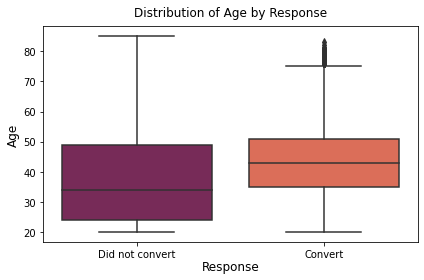

In [13]:
# inspect distribution of age by response category
# set up a figure
fig, ax = plt.subplots()
# draw a boxplot on axes
sns.boxplot(data = data, x = 'Response', y = 'Age', palette='rocket')
# title axes and add padding between title and graph
ax.set_title('Distribution of Age by Response', pad=10)
# set x- and y-axis labels, padding, and fontsize
ax.set_xlabel('Response', labelpad=1, fontsize=12)
ax.set_ylabel('Age', labelpad=3, fontsize=12)
# rename labels from 0 / 1 to Did not convert / Convert
ax.set_xticklabels(['Did not convert', 'Convert'])
# spacing
fig.tight_layout();

# plt.savefig('images/viz/age.png', transparent=True);

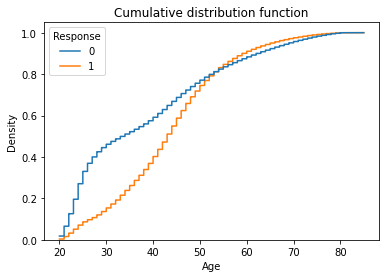

In [14]:
# let's also compare the ECDFs
sns.histplot(x='Age', data=data, hue='Response', bins=len(data), stat="density",
             element="step", fill=False, cumulative=True, common_norm=False);
plt.title("Cumulative distribution function");

In [64]:
len(data.loc[data.Age>35]) # almost 200000 customers over 35

194297

In [65]:
len(data.loc[data.Age<=35]) # almost 200000 customers at or under 35

186812

Visually, there appears to be a difference in the distribution of the ages of those who respond "yes" to the vehicle insurance cross-sell.

Perhaps our younger customers (35 and below) are not as likely to want to purchase vehicle insurance?

50% of respondents who bought vehicle insurance were between the ages of 35 and 50, and only 25% were younger than 35.

If it is true that customers 35 and below are not as interested in vehicle insurance, then our model will probably pick up on that.

Also, we may want to do further market research on this customer population in particular to see if we can change this trend.

#### Driver's License

In [15]:
# did anyone without a driver's license get vehicle ins?
print('Responses for Customers without a Driver\'s License:')
data.loc[data.Driving_License==0,'Response'].value_counts(normalize=True)

Responses for Customers without a Driver's License:


0    0.949507
1    0.050493
Name: Response, dtype: float64

5% of customers who did not have a driver's license still bought vehicle insurance! But the other 95% did not.

In [16]:
print('Responses for Customers with a Driver\'s License:')
data.loc[data.Driving_License==1,'Response'].value_counts(normalize=True)

Responses for Customers with a Driver's License:


0    0.877283
1    0.122717
Name: Response, dtype: float64

Customers with a driver's license have a similar distribution of responses to the overall distribution of responses. This implies that we don't have many health insurance customers without a driver's license which I can believe; we probably don't have many young customers who don't have a driver's license, though perhaps we have some older customers who have let their driver's license lapse.)

In [17]:
len(data.loc[data.Driving_License==0])

812

Out of over 300,000 health insurance customers, only 812 don't have a driver's license.

#### Region

How many health insurance customers do we have in each region?

In [ ]:
np.mean()

In [41]:
region_size = data.groupby('Region_Code').count()['Response'].sort_values(ascending=False)

print(region_size[:15])
print('.')
print('.')
print('.')
print(region_size[1:])

Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
Name: Response, dtype: int64
.
.
.
Region_Code
1.0     1008
44.0     808
42.0     591
52.0     267
51.0     183
Name: Response, dtype: int64


So some regions are larger than others and, therefore, account for a larger portion of our customer base.

Are customers from certain regions more likely to be interested in vehicle insurance?

In [23]:
# divide the number of 1s by the total number of records PER REGION
region_percentage = data.loc[data.Response == 1].groupby('Region_Code').count()['Response']\
/ data.groupby('Region_Code').count()['Response']

# sort in descending order & inspect top 5
print('Conversion Rates for Top 5 Regions:')
print(region_percentage.sort_values(ascending = False)[:51])
print('\n')

# compare to average conversion rates by region & standard deviation
print(f'Average Conversion Rate by Region: {round(np.mean(region_percentage), 4)}')
print(f'+- {round(np.std(region_percentage), 2)}.')

Conversion Rates for Top 5 Regions:
Region_Code
38.0    0.192004
28.0    0.187163
19.0    0.162866
4.0     0.158245
23.0    0.153061
51.0    0.153005
Name: Response, dtype: float64


Average Conversion Rate by Region: 0.1008
+- 0.03.


The "top 5" regions do have better conversion rates than the average. Their rates are 2 to 6 percent higher than the range in which "most" region's conversion rates fall.

This would be a great area for further analysis and market research, though it may not fit into a classification model meaningfully or well.

#### Previously Insured

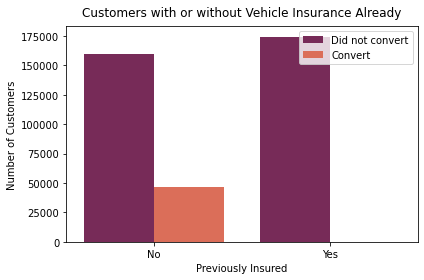

In [24]:
# how does already having vehicle insurance affect response rate?

# set up a figure
fig, ax = plt.subplots()
# how many customers from each response category were previously insured?
sns.countplot(data = data, x = 'Previously_Insured', hue = 'Response', palette='rocket')
# title the plot
ax.set_title('Customers with or without Vehicle Insurance Already', pad=10)
# re-title axes and change labels of bars
ax.set_xticklabels(['No', 'Yes']) # 1 bar is yes-previously insured, other is no
ax.set_xlabel('Previously Insured')
ax.set_ylabel('Number of Customers')
# generate legend to explain hue
ax.legend(labels=['Did not convert', 'Convert'])
# figure spacing
fig.tight_layout();

# plt.savefig('images/viz/previously_insured.png', transparent=True);

In [25]:
# virtually no one who already has vehicle ins went for the cross-sell
data.loc[ data['Previously_Insured'] == 1 , 'Response'].value_counts()

0    174470
1       158
Name: Response, dtype: int64

So 158 people who already had vehicle insurance *did* purchase vehicle insurance from us as well, but the vast majority of our health insurance customers who already have vehicle insurance don't switch to ours.

Is this something we can tackle with a marketing campaign, like Progressive's insurance price comparison tool or Geico's switch and save commercials, or is this too tough of a market segment to try to reach right now?

#### Vehicle Damage

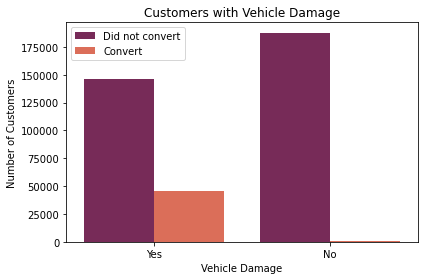

In [26]:
# how does vehicle damage (or lack thereof) affect response rate?

# set up a figure
fig, ax = plt.subplots()
# how many customers from each response category have vehicle damage?
sns.countplot(data = data, x = 'Vehicle_Damage', hue = 'Response', palette='rocket')
# title the plot
ax.set_title('Customers with Vehicle Damage')
# label axes
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Vehicle Damage')
# show legend
ax.legend(labels=['Did not convert', 'Convert'])
# figure spacing
fig.tight_layout();

# plt.savefig('images/viz/vehicle_damage.png', transparent=True);

In [70]:
data.loc[data.Vehicle_Damage=='Yes', 'Response'].value_counts(normalize=True)

0    0.762345
1    0.237655
Name: Response, dtype: float64

In [71]:
data.loc[data.Vehicle_Damage=='No', 'Response'].value_counts(normalize=True)

0    0.994796
1    0.005204
Name: Response, dtype: float64

A higher percentage of customers *with* vehicle damage went for the cross-sell. So we are more successful so far in converting customers who have already experienced the type of event that prompts people to buy insurance.

#### Vehicle Age

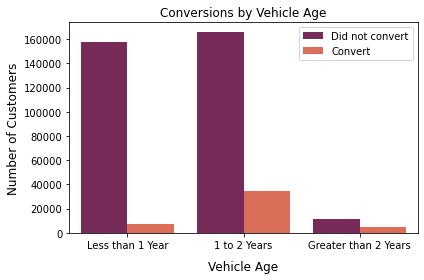

In [27]:
# Is there a correlation b/w vehicle age & response rate?

# set up figure
fig, ax = plt.subplots()
# for customers with vehicles of different ages, what does the response ratio look like?
sns.countplot(data = data, x = 'Vehicle_Age', hue = 'Response',
             order = ['< 1 Year', '1-2 Year', '> 2 Years'], # order by increasing age
             palette='rocket')
# set plot title & axes labels
ax.set_title('Conversions by Vehicle Age')
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_xlabel('Vehicle Age', labelpad=10, fontsize=12)
# re-name bar labels
ax.set_xticklabels(['Less than 1 Year', '1 to 2 Years', 'Greater than 2 Years'])
# show legend
ax.legend(labels=['Did not convert', 'Convert'])
# spacing
fig.tight_layout();

# plt.savefig('images/viz/vehicle_age.png');

Wow - very few of our customers (comparatively) have vehicles that are more than 2 years old. This is shocking to me, and it makes me think that I should check the data and make sure that there is not an issue either with my data preparation steps or the data source or the data entry process.

But for now, if this is the true data we have, then it looks like health insurance customers with a vehicle that is 1 to 2 years old are the most likely to purchase vehicle insurance.

#### Vintage

So this deserves some explanation. 'Vintage' refers to *how many days the customer has been with the company*. It has nothing to do with whether or not their car is vintage. 😀

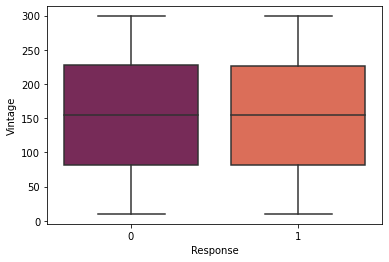

In [28]:
# distribution of vintage by response category
sns.boxplot(data = data, x = 'Response', y = 'Vintage', palette='rocket');

Interestingly, the distribution of vintage ("customer age with the company", if you will,) appears to be pretty much the same for those who did and didn't purchase vehicle insurance. So brand trust / loyalty doesn't seem to play a role here. (Or if it does, it is not clear from the data.)

#### Annual Premium

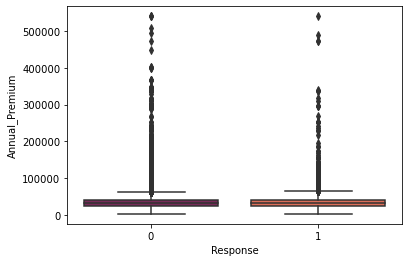

In [29]:
# distribution of annual premiums by response category
sns.boxplot(data = data, x = 'Response', y = 'Annual_Premium', palette='rocket');

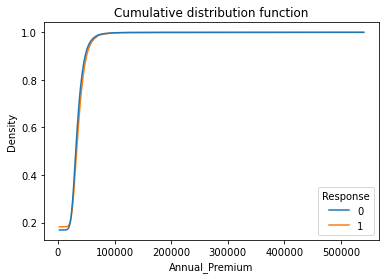

In [30]:
# let's also compare the ECDFs
sns.histplot(x='Annual_Premium', data=data, hue='Response', bins=len(data), stat="density",
             element="step", fill=False, cumulative=True, common_norm=False);
plt.title("Cumulative distribution function");

The boxplot is a little hard to read due to the large number of outliers with larger annual premiums (in fact, some of them are shockingly large - once again, I wonder if the source of my data is legitimate, if there could be data entry errors or issues in the data pipeline somewhere that are causing the values of annual premium to be erroneous in some cases.)

Assuming that this is the real data, and comparing the boxplot and the empirical cumulative distribution functions, then it doesn't *look like* the size of the annual premium is a huge determining factor in predicting which of our customers will purchase vehicle insurance.

#### Policy Sales Channel

In [44]:
# what percentage of sales for each policy sales channel?
by_channel=data.groupby('Policy_Sales_Channel').sum()['Response']\
/ sum(data.Response)

print('Percentage of ALL Vehicle Insurance Purchases by Policy Sales Channel:')
print(by_channel.map(lambda x: round(x, 3)).sort_values(ascending=False)[:157])
print('\n')

# compare to average conversion rates by region & standard deviation
print(f'Average Percentage of All Sales per Sales Channel: {round(np.mean(by_channel), 4)}')
print(f'+- {round(np.std(by_channel), 2)}.')

Percentage of ALL Vehicle Insurance Purchases by Policy Sales Channel:
Policy_Sales_Channel
26.0     0.340
124.0    0.300
152.0    0.083
156.0    0.049
157.0    0.038
Name: Response, dtype: float64


Average Percentage of All Sales per Sales Channel: 0.0065
+- 0.04.


Two policy sales channels outweigh the rest, resulting in more than 60% of the vehicle insurance sales overall.

This is another feature that probably deserves some more analysis - why are some methods of selling policies more effective than others? Are certain channels more effective ways of communicating with certain customers, or do all channels work 'equally well' with all customers?

### Conclusion

This is an imbalanced dataset, so we will almost certainly need to apply some sampling or weighting techniques to encourage our predictive model to classify potential customers.

As far as feature exploration goes, many features seem to have the expected effect. (Customers who already have vehicle insurance don't want to buy ours; customers who have experienced vehicle damage are more likely to purchase vehicle insurance; etc.) There may be marketing strategies we can use to overcome some of the obstacles that customers face when considering purchasing our vehicle insurance.

There also may be some places we are lacking in terms of appealing to customers under the age of 35, product-wise or marketing-wise.

There are some surprises - like customer brand trust not visually contributing to cross-sells, and some phenomena worthy of further investigation (like why does almost everyone in our sample have fairly new cars? Was this a criteria used to select customers for the cross-sell suggestion?)

And finally, looking into particular regions and policy sales channels: two sales channels account for over half of all vehicle insurance cross-sells in this sample, and there are certain regions with higher conversion rates than others. I suggest digging into what makes customers in certain regions more likely to purchase our vehicle insurance - brand presence or lack of competitors? Higher rate of vehicle ownership? Something else? - and whether certains sales channels are more effective with certain *types* of customers, to direct those customers to the best sales channel for their needs.

----

## Data Preparation

In the next couple of sections, I perform a train test split and build a preprocessing pipeline.

## Train Test Split

To aid in selecting the best model, we are going to split our training data into training and test sets, then use cross validation throughout the notebook on the training set only so that we can use the test data as validation data after we select the best model. (Technically, we don't have to do this since there is a separate 'test.csv' in the zip archive with data, but let's do this for practice.)

In [4]:
# separate features from target; also drop region code, not suitable for modeling
X = data.drop(['Region_Code', 'Response'], axis=1)
y = data['Response']

# use sci kit learn's train test split function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

## Preprocessing

I set up a pipeline to preprocess the data after the train test split so that, if this model goes into production, new data can be cleaned and prepared for modeling and continuous monitoring using the pickled pipeline.

Notes on production: if this model is used to generate leads for the sales team, then we need a way of recording the response to each cross-sell offer to a lead generated by the model, to then periodically feed in new data and check the model's ongoing performance.

### Helper Functions for Preprocessing

In [5]:
'''flag whether a sale was made via one of the top 2 policy sales channels'''

# get top 2 channels
top_2_channels = X_train.loc[y_train==1, 'Policy_Sales_Channel'].value_counts(normalize=True).\
index[:2]
# define a function to flag whether a channel is in the list of the top 2 channels
def top_channels(x):
    return x.isin(top_2_channels).astype(int)


'''fix vehicle age names; models can't process column names with <, > symbols'''

# create a dict mapping old values in Vehicle_Age col to new values
new_values = dict(zip(data['Vehicle_Age'].value_counts().index,
                      ['1-2YR', 'under_1YR', 'over_2YR']))
# define a function to replace strings in vehicle age column
def fix_strings(x):
    return x.replace(new_values)


'''change boolean columns to 0 / 1 numerical instead of string'''

def gender_bool(x):
    return x.replace({'Male': 0, 'Female': 1})

def vehicle_damage_bool(x):
    return x.replace({'Yes': 1, 'No': 0})


# instantiate one hot encoder
ohe = OneHotEncoder(handle_unknown='ignore')

# instantiate standard scaler
ss = StandardScaler()

### Preprocessing Pipeline

In [6]:
# set up vehicle age pipe (to fix strings, then one hot encode, in that order)
vehicle_age_pipe = Pipeline(steps=[
    ('fix_vehicle_age_strings', FunctionTransformer(fix_strings)),
    ('ohe_vehicle_age', ohe)
])

# add a feature (top_2_channels) and convert nonnumerical data to numerical
ct = ColumnTransformer(transformers=[
    ('top_2_channels', FunctionTransformer(top_channels), ['Policy_Sales_Channel']),
    ('vehicle_age_pipe', vehicle_age_pipe, ['Vehicle_Age']),
    ('gender_numerical', FunctionTransformer(gender_bool), ['Gender']),
    ('vehicle_damage_numerical', FunctionTransformer(vehicle_damage_bool), ['Vehicle_Damage'])
], remainder='passthrough')

# after initial preprocessing, scale all data
preprocessing = Pipeline(steps=[
    ('ct', ct),
    ('ss', ss)
])

### Fit Pipeline to Training Data

In [7]:
# fit to training data & transform
transformed_array = preprocessing.fit_transform(X_train)

# acess ct / vehicle age pipe to get categories for ohe
access_ct = preprocessing.named_steps['ct']
access_pipe = access_ct.named_transformers_['vehicle_age_pipe']
ohe_categories = list(access_pipe.named_steps['ohe_vehicle_age'].categories_[0])
ohe_categories = [f'vehicle_age_{age}' for age in ohe_categories]

# get list of column names
transformed_cols = ['top_2_policy_sales_channel']
transformed_cols.extend(ohe_categories)
transformed_cols.extend(['gender', 'vehicle_damage'])
transformed_cols.extend(['age',
                         'driving_license',
                         'previously_insured',
                         'annual_premium',
                         'vintage']
                       ) #remaining cols are in same order as original df

# convert transformed array, column names, index of original df into dataframe
X_train = pd.DataFrame(transformed_array,
                       columns=transformed_cols,
                       index=X_train.index)

# inspect results
X_train.head()

,top_2_policy_sales_channel,vehicle_age_1-2YR,vehicle_age_over_2YR,vehicle_age_under_1YR,gender,vehicle_damage,age,driving_license,previously_insured,annual_premium,vintage
id,,,,,,,,,,,
80605,1.218442,0.951358,-0.209484,-0.873970,-0.921216,0.990310,1.366313,0.045903,-0.920425,0.006808,-0.696788
265813,-0.820720,-1.051129,-0.209484,1.144205,1.085522,0.990310,-1.018866,0.045903,1.086455,-1.614386,-0.386050
52340,-0.820720,0.951358,-0.209484,-0.873970,1.085522,0.990310,1.817563,0.045903,-0.920425,0.812062,-0.696788
146538,-0.820720,0.951358,-0.209484,-0.873970,-0.921216,-1.009784,1.559706,0.045903,1.086455,-1.614386,0.319085
70160,-0.820720,-1.051129,-0.209484,1.144205,-0.921216,0.990310,-0.889937,0.045903,1.086455,0.024079,-1.270457


### Transform Test Data Using Fitted Pipeline

In [8]:
# transform test data
transformed_array_test = preprocessing.transform(X_test)

# convert transformed array, column names, index of original df into dataframe
X_test = pd.DataFrame(transformed_array_test,
                      columns=transformed_cols,
                      index=X_test.index)

# inspect results
X_test.head()

,top_2_policy_sales_channel,vehicle_age_1-2YR,vehicle_age_over_2YR,vehicle_age_under_1YR,gender,vehicle_damage,age,driving_license,previously_insured,annual_premium,vintage
id,,,,,,,,,,,
167559,-0.820720,0.951358,-0.209484,-0.873970,-0.921216,0.990310,-0.051901,0.045903,-0.920425,-1.614386,0.773240
240963,1.218442,0.951358,-0.209484,-0.873970,1.085522,0.990310,0.399349,0.045903,-0.920425,0.125046,-1.617049
260485,-0.820720,-1.051129,-0.209484,1.144205,-0.921216,-1.009784,-0.761008,0.045903,1.086455,0.825116,1.717404
201758,1.218442,0.951358,-0.209484,-0.873970,-0.921216,0.990310,0.334885,0.045903,-0.920425,-1.614386,0.020299
350659,-0.820720,-1.051129,-0.209484,1.144205,1.085522,-1.009784,-0.825473,0.045903,1.086455,0.196613,1.526181


----

## Logistic Regression

Fit a baseline logistic regression model to the entire training set, and take a look at the classification report.

In [10]:
# instantiate a model with default parameters
logreg = LogisticRegression(random_state=seed)

# fit to training data
logreg.fit(X_train, y_train)

# make predictions on training data
y_train_preds = logreg.predict(X_train)

# print classification report
print(classification_report(y_train, y_train_preds))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    250881
           1       0.32      0.00      0.00     34950

    accuracy                           0.88    285831
   macro avg       0.60      0.50      0.47    285831
weighted avg       0.81      0.88      0.82    285831



Our baseline model barely picks up on the minority class at all; it looks like it does predict the minority sometimes, due to precision being nonzero, but its recall of the minority is practically 0%. We need to encourage the model to "pick up on" the small minority class, but first, let's examine the baseline model's coefficients.

**Interpreting Model Coefficients**

In [10]:
# take a look at the coefficients of the logistic regression
model_summary = pd.DataFrame({'coefficient': logreg.coef_[0]}, index=X_train.columns)

In [11]:
# keep in mind that an increase by one STDDEV (not unit) results in odds* e^(B)
model_summary['stddev'] = ss.scale_

In [12]:
# print results in order of coefficients
# rather than adding a magnitude column, I am just going to look at the greatest AND least
# coefficients to catch the most influential features (|coefficient| determines influence)
model_summary.sort_values(by='coefficient', ascending=False)

,coefficient,stddev
vehicle_damage,1.005141,0.499976
vehicle_age_1-2YR,0.241608,0.499379
top_2_policy_sales_channel,0.169850,0.490397
vehicle_age_over_2YR,0.145426,0.200678
driving_license,0.055149,0.045806
annual_premium,0.043866,17312.546260
vintage,-0.005407,83.671894
gender,-0.043480,0.498321
vehicle_age_under_1YR,-0.302399,0.495497
age,-0.381690,15.512465


In [13]:
# decay factor for previously_insured
# squared because going from 0 to 1 requires an increase by ~2 standard deviations
np.exp(-1.966)**2

0.019604424469125796

In [14]:
# growth factor for vehicle_damage
# squared because going from 0 to 1 requires an increase by ~2 standard deviations
np.exp(1.005)**2

7.463317347319193

Glancing at the coefficients of our model, the two most important factors in determining how likely an existing health insurance customer is to purchase vehicle insurance are:

- Previously insured: decreases the odds of a customer purchasing vehicle insurance

- Vehicle damage: increases the odds of a customer purhasing vehicle insurance

It's a little difficult to interpret the effects quantitatively because of scaling the data, but I think we can roughly say that a person who already has vehicle insurance has about 2% of the odds of purchasing vehicle insurance from us as someone who doesn't already have vehicle insurance, and a person who has sustained vehicle damage has about 7.5 times the odds of purchasing vehicle insurance from us as someone who hasn't sustained any vehicle damage.

**Tuning the Model**

I think we can get better results from our model by encouraging it to "pick up on" the minority class. (Right now, recall is practically 0% for the minority class, presumably because it is outweighed so heavily by the majority class.)

**Class Imbalance**

In [15]:
# class imbalance
y_train.value_counts(normalize=True)

0    0.877725
1    0.122275
Name: Response, dtype: float64

Because our training data is imbalanced and we are interested in the minority class (about 88% of our healthcare customers were *not* interested in purchasing vehicle insurance; we want to predict the 12% of customers who *are* interested in purchasing vehicle insurance), we are going to focus on recall and precision, using the f1 score to monitor the balance between the two.

Loosely, recall = market share (Out of all of our health insurance customers, how many customers are we reaching out of those who are actually interested in purchasing vehicle insurance?)
and precision = conversion rate (out of all of our health insurance customers who we contact with an offer to sell them vehicle insurance - assuming that we contact every customer predicted to convert by the model, how many of them "convert" to being a vehicle insurance customer?)

It is important to balance precision and recall because we want the sales team to work efficiently and keep up their morale (reasonable precision / conversion rates), but we also want to reach as many potential vehicle insurance customers as possible (recall.)

In [16]:
# use cross_val_score to obtain the mean f1 score for our baseline logreg model on train data
np.mean(cross_val_score(logreg, X_train, y_train, scoring='f1'))

0.00040017972255769376

Let's try adjusting the class_weight parameter of sklearn's implementation of logistic regression to encourage our model to pick up on more cases of the minority class (thereby, hopefully increasing recall and, thus, the f1 score -- as long as precision doesn't fall too much.)

**Class_weight Parameter**

**A note on model names** *Unfortunately, I chose the variable name "lr" for the logistic regression model with balanced class weights and "logreg" for the logistic regression model with no class weights (all weighted 1.) These are not very descriptive names,  but they have been used throughout the notebook.*

In [11]:
lr = LogisticRegression(class_weight='balanced',
                        random_state=seed)

np.mean(cross_val_score(lr, X_train, y_train, scoring='f1'))

0.39809358051187327

Much better! But is adjusting the class_weight in the model the best way to address the class imbalance, or could we do better by undersampling our training data?

**Undersampling**

In [18]:
# instantiate a random under sampler; default is to equalize the number of cases of each class
rus = RandomUnderSampler(random_state=seed)

# set up a pipeline to randomly undersample the training data, then apply baseline log reg
pipe = imbPipeline(steps=[
    ('rus', rus),
    ('logreg', logreg) # use equal class weights, since undersampling
])

# cross-validate (make folds, then randomly undersample, then fit logistic regression model)
np.mean(cross_val_score(pipe, X_train, y_train, scoring='f1'))

0.3981519620911089

Undersampling didn't improve the f1 score considerably more than balancing the class weights, so let's abandon undersampling and take advantage of using all of our training data.

What about oversampling? Could SMOTE improve our f1 score?

**Oversampling**

In [62]:
# instantiate SMOTE; default is to equalize the number of cases from each class
smote = SMOTE(random_state=seed)

# set up a pipeline to randomly oversample the training data, then apply baseline log reg
pipe = imbPipeline(steps=[
    ('oversample', smote),
    ('logreg', logreg) # use equal class weights, since oversampling
])

# store results, including training f1 scores
results = cross_validate(pipe, X_train, y_train, return_train_score=True, scoring='f1')

# compute mean train and test f1 scores
avg_train_f1 = np.mean(results['train_score'])
avg_test_f1 = np.mean(results['test_score'])

# print results
print(f'Mean train f1 score after SMOTE: {avg_train_f1}')
print(f'Mean test f1 score after SMOTE: {avg_test_f1}')

Mean train f1 score after SMOTE: 0.39803573375279944
Mean test f1 score after SMOTE: 0.3980255815509219


So, it doesn't look like we are particularly overfit on the training data. I do want to know how the precision and recall are affecting the f1 score (i.e. is one of them much better than the other, or are they both comparably low?)

**Full report on (baseline model with) SMOTE**

In [63]:
# get full classification report for one fold of training data

# create 5 shuffled folds of training data
kf = KFold(random_state=seed, shuffle=True)
# get the indices for the train and test sets within the training data
train_test_indices = list(kf.split(X_train))

# select a partition from folds
train_index, test_index = train_test_indices[0]

# separate training data into "fold", the training training data,
# and "reserved", the validation training data
X_fold = X_train.loc[X_train.index.isin(train_index)]
y_fold = y_train.loc[y_train.index.isin(train_index)]

X_reserved = X_train.loc[X_train.index.isin(test_index)]
y_reserved = y_train.loc[y_train.index.isin(test_index)]

# resample training data
X_fold_resampled, y_fold_resampled = smote.fit_resample(X_fold, y_fold)

# fit baseline logistic regression to resampled data
logreg.fit(X_fold_resampled, y_fold_resampled)

# make predictions on train and test data
y_fold_preds = logreg.predict(X_fold)
y_reserved_preds = logreg.predict(X_reserved)

# print full classification report for train & test data
print('Training Data:')
print(classification_report(y_fold, y_fold_preds))
print('Test Data:')
print(classification_report(y_reserved, y_reserved_preds))

Training Data:
              precision    recall  f1-score   support

           0       0.99      0.60      0.75    150610
           1       0.25      0.97      0.40     20966

    accuracy                           0.64    171576
   macro avg       0.62      0.78      0.57    171576
weighted avg       0.90      0.64      0.70    171576

Test Data:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     37555
           1       0.25      0.97      0.40      5310

    accuracy                           0.64     42865
   macro avg       0.62      0.78      0.57     42865
weighted avg       0.90      0.64      0.70     42865



It might be worth *trying* to overfit on the data, then pruning the model to try to find the right balance between bias and variance. It's possible that our current model is missing some of the patterns in the data and suffering from bias.

**Decrease regularization strength, with SMOTE**

In [64]:
# instantiate logistic regression model with a higher value for C, to decrease regularization
# use equal class weights, since oversampling
logreg_c = LogisticRegression(C=1000, random_state=seed)

# set up a pipeline to randomly oversample the training data, then apply logistic regression
pipe = imbPipeline(steps=[
    ('oversample', smote),
    ('logreg_c', logreg_c)
])

# store results, including training f1 scores
results = cross_validate(pipe, X_train, y_train, return_train_score=True, scoring='f1')

# compute mean train and test f1 scores
avg_train_f1 = np.mean(results['train_score'])
avg_test_f1 = np.mean(results['test_score'])

# print results
print('Training Data:')
print(avg_train_f1)
print('Test Data:')
print(avg_test_f1)

Training Data:
0.39803573375279944
Test Data:
0.3980255815509219


Decreasing the regularization strength seemed to have little to no effect on the f1-score.

It is easier to deal with the logistic regression model with balanced class_weight than it is to use a pipeline with SMOTE or undersampling, and so far, these approaches have performed similarly, so I am going to proceed with a logistic regression model with balanced class weights (lr) and the original, imbalanced training data.

**Stats for logistic regression with balanced class_weight, original training data**

In [65]:
# reinstantiate logistic regression with balanced class weights
# not necessary, but now we can see the parameters next to the metrics
lr = LogisticRegression(class_weight='balanced',
                        random_state=seed)

# get mean f1, recall, and precision with cross-validation on training data
lr_f1 = np.mean(cross_val_score(lr, X_train, y_train, scoring='f1'))
lr_recall = np.mean(cross_val_score(lr, X_train, y_train, scoring='recall'))
lr_precision = np.mean(cross_val_score(lr, X_train, y_train, scoring='precision'))

# print results
print(f'f1-score: {lr_f1}')
print(f'recall: {lr_recall}')
print(f'precision: {lr_precision}')

f1-score: 0.39809358051187327
recall: 0.9711301859799712
precision: 0.2503621042781901


The recall is significantly higher than the precision, so next, I am going to look for an optimal balance between the two by thresholding. (If the precision can be improved without significantly reducing the recall, then I want to do so.)

Let's plot the roc curve for several train / test folds of the training data to see if we can improve the precision-recall balance by adjusting the threshold.

I read about using the g-mean to determine the point (on the roc curve) which is closest to the top left corner of the plot, thereby balancing the true and false positive rates, [here](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/), on the blog Machine Learning Mastery.

**Plot ROC curve**

I chose to cross-validate my results for the best threshold.

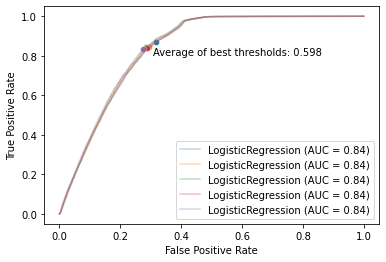

In [23]:
# create 5 shuffled folds of training data
kf = KFold(random_state=seed, shuffle=True)

# get the indices for the train and test sets within the training data
train_test_indices = list(kf.split(X_train))

# create an empty list to hold the best threshold for each fold
best_thresh = []

# set up a figure and axes
fig, ax = plt.subplots()

# iterate over the number of folds
for i in range(len(train_test_indices)):
    train_index, test_index = train_test_indices[i] # grab indices for train & test
    
    # create "folds" (training data) from train_indices
    X_fold = X_train.loc[X_train.index.isin(train_index)]
    y_fold = y_train.loc[y_train.index.isin(train_index)]
    
    # create "reserved" (test data for this fold of training data) from test indices
    X_reserved = X_train.loc[X_train.index.isin(test_index)]
    y_reserved = y_train.loc[y_train.index.isin(test_index)]
    
    # fit logistic regression model to "training fold"
    lr.fit(X_fold, y_fold)
    
    # get access to thresholds generating each (fpr, tpr) point
    # predict probability of class 1
    y_reserved_scores = lr.predict_proba(X_reserved)[:, 1]
    # pass to roc_curve function to get list of fprs and tprs for different thresholds
    fpr, tpr, thresholds = roc_curve(y_reserved, y_reserved_scores)
    
    # find threshold which maximizes gmean; finds point closest to top left corner
    gmeans = np.sqrt(tpr*(1 - fpr)) # sqrt of specifity * sensitivity
    best_idx = np.argmax(gmeans) # get index of biggest gmean
    best_thresh.append(thresholds[best_idx]) # append threshold that resulted in biggest gmean
                                             # to list of best thresholds
    # plot the roc curve for this fold
    plot_roc_curve(lr,
                   X_reserved,
                   y_reserved,
                   ax = ax,
                   alpha = 0.3)
    # plot the point with max gmean
    sns.scatterplot(x=[fpr[best_idx]], y=[tpr[best_idx]], marker='o');

# annotate plot with average of best thresholds
ax.annotate(text=f'Average of best thresholds: {round(np.mean(best_thresh), 3)}',
            xy=(fpr[best_idx]+0.03, tpr[best_idx]-0.03));

Let's also plot the precision-recall curve for various thresholds.

**Plot precision-recall curve**

In [67]:
# taking too long to cross-validate; I'm going to plot for just one fold of training data

# use last fold
lr.fit(X_fold, y_fold)
    
# get precision & recall scores for various thresholds
y_reserved_scores = lr.predict_proba(X_reserved)[:, 1] # predict proba of class 1
# pass to precision_recall_curve to get precision and recall with various thresholds
precision, recall, thresholds = precision_recall_curve(y_reserved, y_reserved_scores)

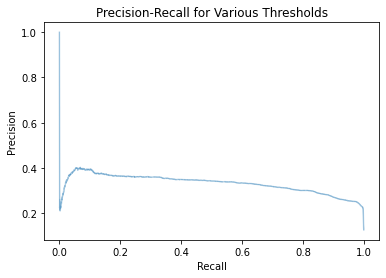

In [25]:
# plot precision-recall curve
# set up figure and axes
fig, ax = plt.subplots()
# set title, axis labels
ax.set(title='Precision-Recall for Various Thresholds',
       xlabel='Recall',
       ylabel='Precision')
# plot recall vs. precision
sns.lineplot(x=recall, y=precision, ax=ax);

I think that a precision around 30% is going to be the best we can do (with this model) in order to have any kind of reasonable recall.

In [26]:
# find the index of the threshold / precision / recall corresponding to average of best
# thresholds based on g-mean
np.argmin(np.abs(thresholds - np.mean(best_thresh)))

26285

In [27]:
# inspect threshold
thresholds[26285]

0.5977721550059437

In [28]:
# inspect recall and precision
(recall[26285], precision[26285])

(0.8473743860974688, 0.28999935354580125)

In [29]:
print(f'f1 score: {2*precision[26285]*recall[26285]/(precision[26285]+recall[26285])}')

f1 score: 0.43211481963107445


Our best logistic regression model is a logistic regression model with `class_weight` parameter set to 'balanced' and a threshold of 0.597772.

This model gives us a recall of about 85% (capturing 85% of interested customers) and a precision of about 30% (only 30% of our leads based on this model will convert), with an <mark>f1 score</mark> of 0.432115.

We didn't really try a whole lot of values for the regularization parameter C. Let's try just a few more to see if it makes a difference in the model under or over fitting.

In [33]:
# use 0.5 threshold for now; try different values for C

# set up parameter grid with various values for C; higher C = less regularization
param_grid = [
    {'C': [0.01, 0.1, 1, 100, 1000, 10000],
     'random_state': [seed]}
]

# instantiate grid search; return train scores to check for overfitting
grid_search = GridSearchCV(lr, param_grid, return_train_score=True, scoring='f1')

# fit to training data
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          random_state=2012),
             param_grid=[{'C': [0.01, 0.1, 1, 100, 1000, 10000],
                          'random_state': [2012]}],
             return_train_score=True, scoring='f1')

In [34]:
# print best f1 score
grid_search.best_score_

0.39809590923837596

In [37]:
# print training f1 scores (mean f1 score for each value of C)
grid_search.cv_results_['mean_train_score']

array([0.39801425, 0.39802746, 0.39801746, 0.39801746, 0.39801746,
       0.39801746])

In [38]:
# print test f1 scores (mean f1 score for each value of C)
grid_search.cv_results_['mean_test_score']

array([0.39803997, 0.39808888, 0.39809358, 0.39809591, 0.39809591,
       0.39809591])

It's very hard to get this model to overfit! Changing the value of C doesn't particularly affect the f1 score on the train or test sets.

So the best logistic regression model specified above is still our best logistic regression model.

## K Neighbors Classifier

Let's try some other types of models, to see if we can do any better.

In [54]:
# instantiate a baseline K Neighbors classifier with default parameter settings
knn = KNeighborsClassifier()

# get mean f1 score from cross-validation
np.mean(cross_val_score(knn, X_train, y_train, scoring='f1'))

0.22056036953620556

The f1 score of our baseline K Neighbors Classifier is worse than that of our best logistic regression model.

Let's try under or over sampling, then applying K Neighbors.

**Undersampling**

In [58]:
# set up a pipeline to undersample, then apply our baseline k neighbors classifier
pipe = imbPipeline(steps=[
    ('rus', rus),
    ('knn', knn)
])

# print mean f1 score from cross-validation
np.mean(cross_val_score(pipe, X_train, y_train, scoring='f1'))

0.4069725246725112

Undersampling improved our f1 score considerably over the baseline model, but its performance is not as good (yet) as our best logistic regression model.

**Oversampling**

In [70]:
# try oversampling with SMOTE
smote = SMOTE(random_state=seed)

# set up a pipeline to randomly oversample the training data, then apply logistic regression
pipe = imbPipeline(steps=[
    ('oversample', smote),
    ('classify', knn)
])

# store results, including training f1 scores
results = cross_validate(pipe, X_train, y_train, return_train_score=True, scoring='f1')

# compute mean train and test f1 scores
avg_train_f1 = np.mean(results['train_score'])
avg_test_f1 = np.mean(results['test_score'])

# print results
print('Training Data:')
print(avg_train_f1)
print('Test Data:')
print(avg_test_f1)

Training Data:
0.6017891874672948
Test Data:
0.37926183496107735


Using SMOTE to balance the instances of the minority and majority classes resulted in a model which is overfit, and performs *worse* on the test data than the model we fit on the undersampled training data.

Let's try tuning our baseline K Neighbors classifier fit to the undersampled training data.

In [62]:
# set up a parameter grid with values of knn parameters to try
param_grid = [
    {'knn__n_neighbors': [5, 10, 15, 20], # how many neighbors vote?
    'knn__weights': ['uniform', 'distance'],# should votes be weighted by similarity/closeness?
    'knn__p': [1, 2]} # try Manhattan distance as well as Euclidean distance
]

# set up a pipeline to randomly undersample, then apply classifier
pipe = imbPipeline(steps=[
    ('rus', rus),
    ('knn', knn)
])

# perform grid search with f1 score
grid_search = GridSearchCV(pipe, param_grid, scoring='f1')

# fit to training data
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('rus',
                                        RandomUnderSampler(random_state=2012)),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__n_neighbors': [5, 10, 15, 20], 'knn__p': [1, 2],
                          'knn__weights': ['uniform', 'distance']}],
             scoring='f1')

In [63]:
# inspect best f1 score
grid_search.best_score_

0.42400761977497287

The best K Neighbors classifier we found with our grid search still underperforms compared to our best logistic regression model so far.

In [64]:
# inspect best estimator parameters
grid_search.best_estimator_

Pipeline(steps=[('rus', RandomUnderSampler(random_state=2012)),
                ('knn', KNeighborsClassifier(n_neighbors=20))])

Looking at our best estimator, increasing the number of neighbors is what improved our score (all other settings remained at their default.)

The best model is at the edge of the list of parameter values provided to the grid search.

Let's perform another grid search with an extended list of values for n_neighbors.

In [71]:
# set up parameter grid of values to try for knn parameter n_neighbors
param_grid = [
    {'knn__n_neighbors': [20, 50, 100]} # try larger numbers of neighbors
]

# set up pipeline to undersample then classify; technically, don't need to redo
pipe = imbPipeline(steps=[
    ('rus', rus),
    ('knn', knn)
])

# perform grid search with scoring = f1 score
grid_search = GridSearchCV(pipe, param_grid, scoring='f1')

# fit to training data
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('rus',
                                        RandomUnderSampler(random_state=2012)),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__n_neighbors': [20, 50, 100]}], scoring='f1')

In [74]:
# inspect best f1 score
grid_search.best_score_

0.42400761977497287

In [75]:
# inspect best estimator
grid_search.best_estimator_

Pipeline(steps=[('rus', RandomUnderSampler(random_state=2012)),
                ('knn', KNeighborsClassifier(n_neighbors=20))])

Increasing the number of neighbors to 50 did not increase the f1 score.

Let's try a tighter range for the number of neighbors.

In [58]:
# set up parameter grid of values to try for knn parameter n_neighbors
param_grid = [
    {'knn__n_neighbors': [15, 18, 20, 22, 25]}
]

# set up pipe to undersample, then classify; again, don't have to redo, but for clarity
pipe = imbPipeline(steps=[
    ('rus', rus),
    ('knn', knn)
])

# perform grid search with scoring = f1 score
grid_search = GridSearchCV(pipe, param_grid, scoring='f1')

# fit to training data
grid_search.fit(X_train, y_train)

# inspect best score
grid_search.best_score_

0.42400761977497287

In [59]:
# inspect best estimator
grid_search.best_estimator_

Pipeline(steps=[('rus', RandomUnderSampler(random_state=2012)),
                ('knn', KNeighborsClassifier(n_neighbors=20))])

Once again, we see no change in the f1 score.

So our best K Neighbors Classifier has a slightly worse performance than our best logistic regression model.

Does changing the threshold make a difference?

In [61]:
# find best threshold for best knn model using train / validation split of training data

# clone best knn estimator (actually a pipeline including random under sampler)
best_knn = clone(grid_search.best_estimator_)

# create 5 shuffled folds of training data
kf = KFold(random_state=seed, shuffle=True)

# get the indices for the train and test sets within the training data
train_test_indices = list(kf.split(X_train))

# select a partition
# select a partition from folds
train_index, test_index = train_test_indices[0]

# separate training data into "fold", the training training data,
# and "reserved", the validation training data
X_fold = X_train.loc[X_train.index.isin(train_index)]
y_fold = y_train.loc[y_train.index.isin(train_index)]

X_reserved = X_train.loc[X_train.index.isin(test_index)]
y_reserved = y_train.loc[y_train.index.isin(test_index)]

# fit best estimator to training data
best_knn.fit(X_fold, y_fold)

# get scores on training training data
y_fold_scores = best_knn.predict_proba(X_fold)[:, 1]

# get list of fprs and tprs for different thresholds
fpr, tpr, thresholds = roc_curve(y_fold, y_fold_scores)
    
# find threshold which maximizes gmean; finds point closest to top left corner
gmeans = np.sqrt(tpr*(1 - fpr)) # sqrt of specifity * sensitivity
best_idx = np.argmax(gmeans) # get index of biggest gmean
best_knn_thresh = thresholds[best_idx] # append threshold that resulted in biggest gmean
                                       # to list of best thresholds

# get predictions for training and test data with best threshold
y_fold_preds = (y_fold_scores >= best_knn_thresh) 
y_reserved_scores = best_knn.predict_proba(X_reserved)[:, 1]
y_reserved_preds = (y_reserved_scores >= best_knn_thresh)

# print results (f1 score)
print(f'Training f1 Score with Best Threshold: {f1_score(y_fold, y_fold_preds)}')
print(f'Test f1 Score with Best Threshold: {f1_score(y_reserved, y_reserved_preds)}')

Training f1 Score with Best Threshold: 0.4304611842253775
Test f1 Score with Best Threshold: 0.4220552723370003


The f1 score for our best knn estimator / sampling technique combo with its best threshold is still lower than that of our best logistic regression / sampling technique combo with its best threshold.

----------

## Ensemble Method

Let's try fitting an ensemble of decision trees to our data to see if it performs any better than our single model methods. So far, we have not used any tree-based methods, so perhaps using a tree-based model will improve the performance.

In [78]:
# instantiate baseline AdaBoost classifier; increase weight of "difficult" training examples
# with each boosted tree to encourage fixing earlier tree's mistakes
ada = AdaBoostClassifier(random_state=seed)

# get mean f1 score from cross-validation
np.mean(cross_val_score(ada, X_train, y_train, scoring='f1'))

0.00028600847380562074

As before, our baseline model doesn't do very well at predicting the minority class. Let's undersample and try again.

In [79]:
# instantiate undersampler; don't have to redo, but for clarity
rus = RandomUnderSampler(random_state=seed)

# set up pipeline to undersample, then classify with AdaBoost
pipe = imbPipeline(steps=[
    ('undersampler', rus),
    ('estimator', ada)
])

# get mean f1 score from cross-validation
np.mean(cross_val_score(pipe, X_train, y_train, scoring='f1'))

0.4154236208272158

As before, we have a massive improvement upon dealing with class imbalance. Let's check the precision recall tradeoff.

In [42]:
# fit the undersample & classify pipe from above to the entire set of training data
pipe.fit(X_train, y_train)

# get predictions on training data
y_train_preds = pipe.predict(X_train)

# print the classification report for the model on our training data
print(classification_report(y_train, y_train_preds))

              precision    recall  f1-score   support

           0       0.99      0.65      0.78    250881
           1       0.27      0.94      0.42     34950

    accuracy                           0.68    285831
   macro avg       0.63      0.79      0.60    285831
weighted avg       0.90      0.68      0.74    285831



In [43]:
# plot precision recall curve

# get predicted probabilities for class 1 on the training data
y_train_scores = pipe.predict_proba(X_train)[:, 1]

# get precision and recall of the model at various thresholds
precision, recall, thresholds = precision_recall_curve(y_train, y_train_scores)

<ipython-input-44-0b98511833a2>:3: RuntimeWarning: invalid value encountered in true_divide
  f1s = 2*precision*recall/(precision + recall)


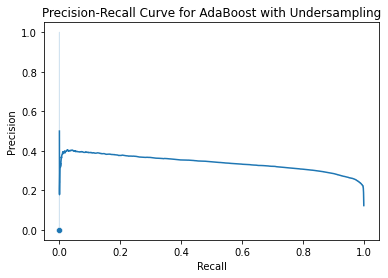

In [44]:
# instantiate a figure and axes
fig, ax = plt.subplots()

# calculate f1 score of the model at each threshold (this didn't actually work out)
f1s = 2*precision*recall/(precision + recall)
best_f1 = np.argmax(f1s) # get index of highest f1 score

# title the graph & label each axis
ax.set(title='Precision-Recall Curve for AdaBoost with Undersampling',
       xlabel='Recall',
       ylabel='Precision')
sns.lineplot(x=recall, y=precision) # plot the precision-recall curve
# plot the point corresponding to the threshold that gave the model the highest f1 score
# didn't work out
sns.scatterplot(x=[recall[best_f1]], y=[precision[best_f1]], marker='o');

AdaBoost doesn't seem to perform any better than our best logistic regression model.

In [50]:
# inspect feature importances

pd.DataFrame({'feat_importance':ada.feature_importances_}, index=X_train.columns).sort_values(
by='feat_importance', ascending=False)

,feat_importance
age,0.46
annual_premium,0.14
vehicle_age_under_1YR,0.10
vehicle_damage,0.10
previously_insured,0.08
vintage,0.04
top_2_policy_sales_channel,0.02
vehicle_age_over_2YR,0.02
gender,0.02
driving_license,0.02


Interesting - customer age is the most important feature by a long shot, followed by some contribution from annual premium, vehicle age, vehicle damage and previously insured. There is a bit of contribution from vintage, and little to no contribution from the other five features.

The most impactful features in by best AdaBoost model and my best Logistic Regression model are different, so I am going to try combining their predictions with a voting classifier to see if they balance each other out in some way to make a better prediction overall.

----

## Voting Classifier

Below, I set the "voting" parameter of the voting classifier to soft. This means that the classifier will *add* the predicted probabilities from each model for an observation, then select the class with the highest *sum* of predicted probabilities from each model.

In [80]:
# instantiate a voting classifier with baseline logistic regression
vote = VotingClassifier(estimators=[
    ('logreg', logreg), # use baseline logistic regression since we are undersampling
    ('adaboost', ada)
], voting='soft')

# set up a pipeline to undersample, then classify using a "soft" vote b/w logreg & ada
pipe = imbPipeline(steps=[
    ('undersample', rus),
    ('estimate', vote)
])

# get mean f1 score from cross-validation
np.mean(cross_val_score(pipe, X_train, y_train, scoring='f1'))

0.39821434114853216

In [81]:
# view entire classification report
pipe.fit(X_train, y_train)
y_train_preds = pipe.predict(X_train)
print(classification_report(y_train, y_train_preds))

              precision    recall  f1-score   support

           0       0.99      0.60      0.74    250881
           1       0.25      0.97      0.40     34950

    accuracy                           0.64    285831
   macro avg       0.62      0.78      0.57    285831
weighted avg       0.90      0.64      0.70    285831



The voting classifier didn't have the hoped-for effect on the performance metrics. It's hanging with the rest of them, but doesn't provide an improvement commensurate to its additional complexity.

-----

## Final Model

Our best model is a logistic regression model with `class_weight` parameter set to 'balanced' and a threshold of 0.597772.

This model gives us a recall of about 85% (capturing 85% of interested customers) and a precision of about 30% (only 30% of our leads based on this model will convert), with an <mark>f1 score</mark> of 0.432115.

In [9]:
# check best model metrics on hold out test set

# instantiate best model
best_model = LogisticRegression(class_weight='balanced', random_state=seed)

# fit to entire set of training data
best_model.fit(X_train, y_train)

# get predicted probabilities for class 1 on test set
y_test_scores = best_model.predict_proba(X_test)[:, 1]
# use predicted probabilities & custom threshold to make predictions on test set
y_test_preds = (y_test_scores > 0.597772).astype(int)

# print the classification report for our best model on the validation set
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     83518
           1       0.29      0.85      0.43     11760

    accuracy                           0.72     95278
   macro avg       0.63      0.78      0.62     95278
weighted avg       0.89      0.72      0.77     95278



Our final model performs as expected on the test data, with a precision of 29% and a recall of 85%.

If the sales team uses this model to determine leads, then they will have a long run conversion rate of 29%. In theory, this is better than the base conversion rate of 12% if randomly selecting health insurance customers to contact, based on the fact that 12% health insurance customers are interested in purchasing vehicle insurance. (So we have roughly doubled our conversion rate.)

Assuming that the sales team has time to contact every lead suggested by the model, then we would capture 85% of the market for vehicle insurance among our health insurance customers. If time/efficiency is not an issue here, then the model's threshold can be adjusted down again to increase recall to nearly 96% with an associated drop in precision that reduces the sales team's efficiency.

In [122]:
# check final model coefficients
pd.DataFrame({'coefficient': best_model.coef_[0]}, index=X_test.columns).sort_values(
    by='coefficient',
    ascending=False)

,coefficient
vehicle_damage,1.001140
vehicle_age_1-2YR,0.237921
top_2_policy_sales_channel,0.175991
vehicle_age_over_2YR,0.144302
driving_license,0.055362
annual_premium,0.032993
vintage,-0.008103
gender,-0.053224
vehicle_age_under_1YR,-0.298227
age,-0.389247


Vehicle damage still has the biggest positive effect on conversion, whereas already having vehicle insurance has the biggest negative effect. Increasing age also apparently has a negative effect on purchasing vehicle insurance, which surprises me based on the distribution of age by response at the beginning.

----

## Conclusion

Based on insights from the data analysis and modeling performed in this notebook, I recommend:

- Use this model (for now) to generate leads for the sales team. Continuously monitor the model's performance by tracking responses to contacted leads from model, then feeding this data back in periodically and checking model metrics (f1, precision, recall) to see if model is performing as expected.


- Prioritize using the top 2 sales channels (more than half of all sales are coming from these channels.) Research effectiveness with different groups of customers.


- Implement initiatives to try to increase conversion rates among customers who the model would classify as probably not interested. Example: customers who already have vehicle insurance. Can we (profitably) offer them a promotion to encourage them to make the switch? Collect data on the effectiveness of these initiatives, and examine the data, build more models to analyze their utility.

-----

## Simulation: A Month of Cross-Sells

The following is a simulated example comparing the conversion rates **with** and **without** the model above generating leads for a one month period.

The simulation assumes a 10 person sales team contacting 10 customers each per day in a 30 day month (probably an underestimate.)

In [46]:
# simulate customer base from training data
# concatenate target response to check conversion rates
customer_base = pd.concat([X_train, y_train], axis=1)

# inspect customer base to check for errors
customer_base.head()

,top_2_policy_sales_channel,vehicle_age_1-2YR,vehicle_age_over_2YR,vehicle_age_under_1YR,gender,vehicle_damage,age,driving_license,previously_insured,annual_premium,vintage,Response
id,,,,,,,,,,,,
80605,1.218442,0.951358,-0.209484,-0.873970,-0.921216,0.990310,1.366313,0.045903,-0.920425,0.006808,-0.696788,0
265813,-0.820720,-1.051129,-0.209484,1.144205,1.085522,0.990310,-1.018866,0.045903,1.086455,-1.614386,-0.386050,0
52340,-0.820720,0.951358,-0.209484,-0.873970,1.085522,0.990310,1.817563,0.045903,-0.920425,0.812062,-0.696788,0
146538,-0.820720,0.951358,-0.209484,-0.873970,-0.921216,-1.009784,1.559706,0.045903,1.086455,-1.614386,0.319085,0
70160,-0.820720,-1.051129,-0.209484,1.144205,-0.921216,0.990310,-0.889937,0.045903,1.086455,0.024079,-1.270457,0


Suppose that, in the course of a month, a sales team of 10 people is able to reach out to 10 customers per day * 30 days. This would result in reaching 3000 customers. (This is probably an under-estimate for a company of this size, but let's roll with it for demonstration's sake.)

If the sales team randomly picks current health insurance customers to contact and offer vehicle insurance, the following represents their conversion rate and recall.

In [83]:
# contact 3000 random customers from customer base
contacted_customers = customer_base.sample(n=3000, replace=False, random_state=seed)

# store conversion rate in no model
no_model = contacted_customers.Response.value_counts(normalize=True)

# print results
print(f'Conversion Rate without Model:\n{no_model}')

Conversion Rate without Model:
0    0.883333
1    0.116667
Name: Response, dtype: float64


In [84]:
contacted_customers.Response.value_counts()

0    2650
1     350
Name: Response, dtype: int64

As expected, about 12% of those 3000 people convert, and 88% do not.

In [98]:
print(f'Without the model, the sales team generates 350 conversions in a month.')

Without the model, the sales team generates 350 conversions in a month.


If the sales team uses our model instead to select current health insurance customers to contact with the offer of vehicle insurance, the following situation occurs:

In [56]:
# make predictions on training data
# get predicted probabilities for class 1
y_train_scores = best_model.predict_proba(X_train)[:, 1]
# use threshold to determine predictions
y_train_preds = (y_train_scores > 0.597772)

# select all customers predicted to convert from customer base
leads = pd.concat([X_train, y_train], axis = 1).loc[y_train_preds, :]

# select 3000 random customers from model predictions
contacted_customers = leads.sample(n=3000, replace=False, random_state=seed)

# store conversion rates in with model
with_model = contacted_customers.Response.value_counts(normalize=True)

# print results
print(f'Conversion Rate with Model:\n{with_model}')

Conversion Rate with Model:
0    0.711333
1    0.288667
Name: Response, dtype: float64


In [82]:
contacted_customers.Response.value_counts()

0    2134
1     866
Name: Response, dtype: int64

We can see that the conversion rate improves from about 12% to almost 29%.

In [99]:
print(f'With the model, 866 customers convert in a month!')

With the model, 866 customers convert in a month!


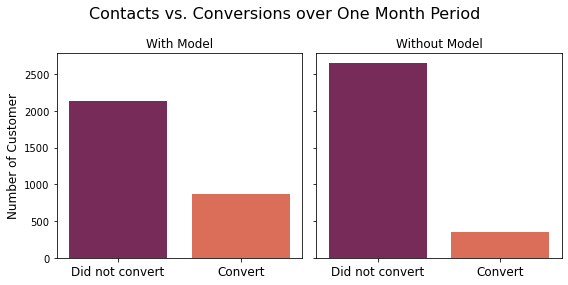

In [115]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(8, 4))

fig.suptitle('Contacts vs. Conversions over One Month Period', fontsize=16)

sns.barplot(x=['did not convert', 'convert'], y=[2134, 866], palette='rocket', ax=ax[0])
sns.barplot(x=['did not convert', 'convert'], y=[2650, 350], palette='rocket', ax=ax[1])
ax[0].set_title('With Model')
ax[1].set_title('Without Model')
ax[0].set_ylabel('Number of Customer', fontsize=12)

ax[0].set_xticklabels(['Did not convert', 'Convert'], fontsize=12)
ax[1].set_xticklabels(['Did not convert', 'Convert'], fontsize=12)

fig.tight_layout();

# plt.savefig('images/viz/model_eval.png', transparent=True);

In [85]:
from scipy import stats

contingency_table = np.array([[2134, 866], [2650, 350]])

alpha = 0.05

stat, p, dof, expected = stats.chi2_contingency(contingency_table)

if p < alpha:
    print('The distribution of conversions is significantly different with the model.')
else:
    print('The distribution of conversions is not signficantly different with the model.')

The distribution of conversions is signficantly different with the model.


-----

## Appendix

### Other Models

In the process of completing this project, I did try using other types of models not presented in this notebook. See [my old notebook](Archive/old_notebook.ipynb) for some models I tried before working through the model selection process depicted here.

### Lead Bands

Look at the distribution of predicted probabilities for the training set.

In [63]:
pd.DataFrame({'prob': best_model.predict_proba(X_train)[:, 1]}).describe()

,prob
count,285831.000000
mean,0.345340
std,0.338313
min,0.000634
25%,0.003601
50%,0.246205
75%,0.704302
max,0.907950


Specify probability bands to designate leads as very good, good, medium or low based on model's predicted likelihood of conversion.

Very good: 85-90% predicted probability of purchasing vehicle insurance

Good: 80-85% probability

Medium: 70-80% probability

Low: 59.7772%-70% probability (59.7772% is the threshold for classifying as a conversion)

In [85]:
# cross validate
kf = KFold(random_state=seed, shuffle=True)
train_test_indices = list(kf.split(X_train))

p_scores = {'very_good': [], 'good': [], 'medium': [], 'low': []}

for i in range(len(train_test_indices)):
    # separate out current folds for train / test
    train_index, test_index = train_test_indices[i]
    X_fold = X_train.loc[X_train.index.isin(train_index)]
    y_fold = y_train.loc[y_train.index.isin(train_index)]
    X_reserved = X_train.loc[X_train.index.isin(test_index)]
    y_reserved = y_train.loc[y_train.index.isin(test_index)]

    # fit model & predict probabilities on test fold
    best_model.fit(X_fold, y_fold)
    y_probs = best_model.predict_proba(X_reserved)[:, 1]

    # specify bands
    very_good_index = (y_probs >= 0.85)
    very_good = y_probs[very_good_index]
    good_index = (y_probs < 0.85) & (y_probs >= 0.8)
    good = y_probs[good_index]
    medium_index = (y_probs < 0.8) & (y_probs >= 0.7)
    medium = y_probs[medium_index]
    low_index = (y_probs < 0.7) & (y_probs >= 0.597772)
    low = y_probs[low_index]
    
    # print band metrics
    print(f'Number of leads per band:')
    print(f'Very good: {len(very_good)}, good: {len(good)}, medium: {len(medium)}, low: \
    {len(low)}\n')
    
    # get predictions
    y_reserved_preds = (best_model.predict_proba(X_reserved)[:, 1] >= 0.597772)
    
    # get precision score for each band
    very_good_score = precision_score(y_reserved[very_good_index],
                                      y_reserved_preds[very_good_index])
    good_score = precision_score(y_reserved[good_index], y_reserved_preds[good_index])
    medium_score = precision_score(y_reserved[medium_index], y_reserved_preds[medium_index])
    low_score = precision_score(y_reserved[low_index], y_reserved_preds[low_index])
    
    # append precision scores for each band
    p_scores['very_good'].append(very_good_score)
    p_scores['good'].append(good_score)
    p_scores['medium'].append(medium_score)
    p_scores['low'].append(low_score)
    
for key, value in p_scores.items():
    print(f'Precision score for {key} leads:')
    print(np.mean(value))
    print('\n')

Number of leads per band:
Very good: 113, good: 1541, medium: 9405, low:     4368

Number of leads per band:
Very good: 89, good: 1514, medium: 9258, low:     4439

Number of leads per band:
Very good: 120, good: 1496, medium: 9220, low:     4477

Number of leads per band:
Very good: 99, good: 1546, medium: 9383, low:     4373

Number of leads per band:
Very good: 90, good: 1464, medium: 9283, low:     4632

Precision score for very_good leads:
0.21906059199934114


Precision score for good leads:
0.38007561000838563


Precision score for medium leads:
0.3092604201944175


Precision score for low leads:
0.21385337579889993




In [87]:
# test on test set

# fit and predict
best_model.fit(X_train, y_train)

y_probs = best_model.predict_proba(X_test)[:, 1]

# specify bands
very_good_index = (y_probs >= 0.85)
very_good = y_probs[very_good_index]
good_index = (y_probs < 0.85) & (y_probs >= 0.8)
good = y_probs[good_index]
medium_index = (y_probs < 0.8) & (y_probs >= 0.7)
medium = y_probs[medium_index]
low_index = (y_probs < 0.7) & (y_probs >= 0.597772)
low = y_probs[low_index]
    
# print band metrics
print(f'Number of leads per band:')
print(f'Very good: {len(very_good)}, good: {len(good)}, medium: {len(medium)}, low: {len(low)}\
\n')
    
# get predictions
y_test_preds = (best_model.predict_proba(X_test)[:, 1] >= 0.597772)
    
# get precision score for each band
very_good_score = precision_score(y_test[very_good_index], y_test_preds[very_good_index])
good_score = precision_score(y_test[good_index], y_test_preds[good_index])
medium_score = precision_score(y_test[medium_index], y_test_preds[medium_index])
low_score = precision_score(y_test[low_index], y_test_preds[low_index])

# print
print(f'Precision on very good leads: {very_good_score}')
print(f'Precision on good leads: {good_score}')
print(f'Precision on medium leads: {medium_score}')
print(f'Precision on low leads: {low_score}')

Number of leads per band:
Very good: 177, good: 3178, medium: 21080, low: 10086

Precision on very good leads: 0.21468926553672316
Precision on good leads: 0.3700440528634361
Precision on medium leads: 0.3079696394686907
Precision on low leads: 0.2241721197699782


This is very strange. The precision of the model seems to be worse for customers classified as 85% to 90% likely to purchase vehicle insurance than for customers classified as 80% to 85% likely to purchase vehicle insurance.